In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record

'1.0.3'

In [3]:
df = pd.read_csv('../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
#df = df.loc['2012-01-01':,:]
df.shape
df.head(3)
df.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


---

#### Using this dataframe, we can of course plot a basic ohlc or candlestick plot:



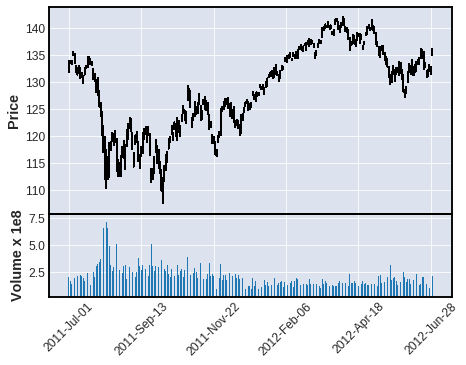

In [4]:
import mplfinance as mpf

mpf.plot(df,volume=True)

---

Let's say we want to plot the Lower Bollinger band along with the basic OHLCV plot.  

We use `make_addplot()` to create the addplot dict, and pass that into the plot() function:

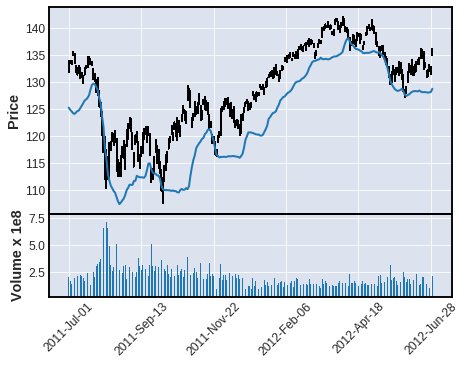

In [5]:
apdict = mpf.make_addplot(df['LowerB'])

mpf.plot(df,volume=True,addplot=apdict)

---

When creating the `addplot` dict, we can specify that we want a scatter plot:

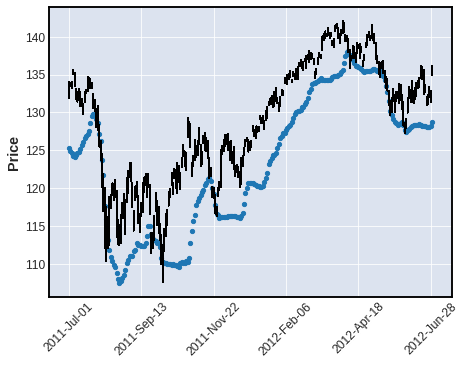

In [6]:
apd = mpf.make_addplot(df['LowerB'],scatter=True)

mpf.plot(df,addplot=apd)

---

The above example is a trivial use of a scatter plot, where the default line plot makes more sense.  

A more helpful use of a scatter plot might be to highlight specific movements in the data.  For example, let's say we want to highlight whenever the "Percent B" Bollinger metric drops below zero.  To do this, let's first calculate a series that contains this information:

In [7]:
def percentB_belowzero(percentB,price):
    import numpy as np
    signal   = []
    previous = -1.0
    for date,value in percentB.iteritems():
        if value < 0 and previous >= 0:
            signal.append(price[date]*0.99)
        else:
            signal.append(np.nan)
        previous = value
    return signal

---
Take a small data set, and calculate a series that shows when the percentB falls below zero:

In [8]:
tdf = df.loc['05-10-2012':'06-07-2012',]  # Take a smaller data set so it's easier to see the scatter points

signal = percentB_belowzero(tdf['PercentB'], tdf['Close'])

---

Now plot the calculated information as an additional scatter plot on top of the the OHLC data:

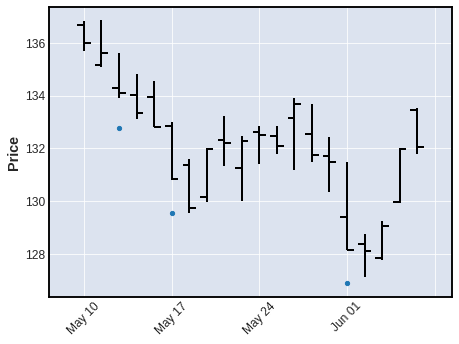

In [9]:
apd = mpf.make_addplot(signal,scatter=True)

mpf.plot(tdf,addplot=apd)

---

We can customize the marker size and shape, to make the scatter markers easier to see:

In [10]:
len(signal)
signal

20

[nan,
 nan,
 132.76890099000002,
 nan,
 nan,
 129.55140099000002,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 126.87840395999999,
 nan,
 nan,
 nan,
 nan]

In [11]:
#STOP HERE

In [12]:
ty = tdf['Close'] - 132.3


    Don't forget to implement `set_ylim` for addplot()
    


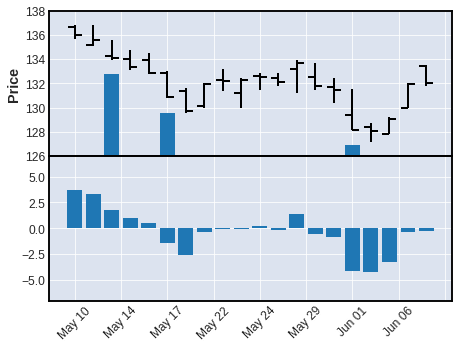

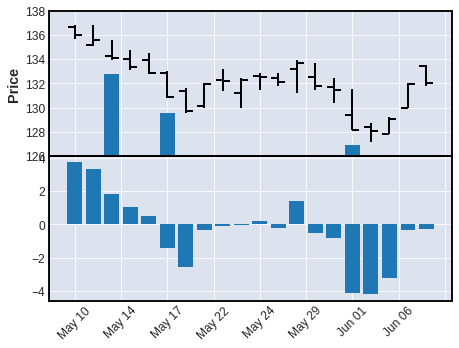

In [13]:
print(
    '''
    ==================================================
    Don't forget to implement `set_ylim` for addplot()
    ==================================================
    '''
)
apd = [ mpf.make_addplot(signal,type='bar',markersize=200,marker='^',panel='A'),
        #mpf.make_addplot(df['Close'],bar=True,panel='B',secondary_y=False)
       mpf.make_addplot(ty,type='bar',panel='B')#,secondary_y=False)
      ]

mpf.plot(tdf,addplot=apd,set_ylim=(126,138),panel_order='ABC',
         set_ylim_panelB=(-7,+7),panel_ratio=(1,1,2))

mpf.plot(tdf,addplot=apd,set_ylim=(126,138),panel_order='ABC',panel_ratio=(1,1,2))

